In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors, LocalOutlierFactor

from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
nfl_df = pd.read_csv('nfl_pts_and_vegas_2014-2023.csv')
print(nfl_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5214 entries, 0 to 5213
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Season        5214 non-null   int64  
 1   Week          5214 non-null   int64  
 2   Team          5214 non-null   object 
 3   Day           5214 non-null   object 
 4   Date          5214 non-null   object 
 5   Win           5214 non-null   int64  
 6   OT            5214 non-null   int64  
 7   Home          5214 non-null   int64  
 8   Opp           5214 non-null   object 
 9   Off_Pts       5214 non-null   int64  
 10  Def_Pts       5214 non-null   int64  
 11  G             5214 non-null   int64  
 12  Spread        5214 non-null   float64
 13  Total         5214 non-null   float64
 14  Actual_Total  5214 non-null   int64  
 15  Div_Game      5214 non-null   int64  
dtypes: float64(2), int64(10), object(4)
memory usage: 651.9+ KB
None


In [3]:
nfl_df['Over'] = np.where(nfl_df['Actual_Total'] > nfl_df['Total'], 1, 0)
nfl_df['Under'] = np.where(nfl_df['Actual_Total'] < nfl_df['Total'], 1, 0)
nfl_df['Push'] = np.where(nfl_df['Actual_Total'] == nfl_df['Total'], 1, 0)
print(nfl_df)

      Season  Week Team  Day    Date  Win  OT  Home  Opp  Off_Pts  Def_Pts  \
0       2014     1  CRD  Mon   8-Sep    1   0     1  SDG       18       17   
1       2014     2  CRD  Sun  14-Sep    1   0     0  NYG       25       14   
2       2014     3  CRD  Sun  21-Sep    1   0     1  SFO       23       14   
3       2014     5  CRD  Sun   5-Oct    0   0     0  DEN       20       41   
4       2014     6  CRD  Sun  12-Oct    1   0     1  WAS       30       20   
...      ...   ...  ...  ...     ...  ...  ..   ...  ...      ...      ...   
5209    2023    13  WAS  Sun   3-Dec    0   0     1  MIA       15       45   
5210    2023    15  WAS  Sun  17-Dec    0   0     0  RAM       20       28   
5211    2023    16  WAS  Sun  24-Dec    0   0     0  NYJ       28       30   
5212    2023    17  WAS  Sun  31-Dec    0   0     1  SFO       10       27   
5213    2023    18  WAS  Sun   7-Jan    0   0     1  DAL       10       38   

       G  Spread  Total  Actual_Total  Div_Game  Over  Under  P

In [4]:
nfl_df = nfl_df.sort_values(by=['Season', 'Week']). reset_index(drop=True)
print(nfl_df)

      Season  Week Team  Day   Date  Win  OT  Home  Opp  Off_Pts  Def_Pts   G  \
0       2014     1  CRD  Mon  8-Sep    1   0     1  SDG       18       17   1   
1       2014     1  ATL  Sun  7-Sep    1   1     1  NOR       37       34   1   
2       2014     1  RAV  Sun  7-Sep    0   0     1  CIN       16       23   1   
3       2014     1  BUF  Sun  7-Sep    1   1     0  CHI       23       20   1   
4       2014     1  CAR  Sun  7-Sep    1   0     0  TAM       20       14   1   
...      ...   ...  ...  ...    ...  ...  ..   ...  ...      ...      ...  ..   
5209    2023    18  SFO  Sun  7-Jan    0   0     1  RAM       20       21  17   
5210    2023    18  SEA  Sun  7-Jan    1   0     0  CRD       21       20  17   
5211    2023    18  TAM  Sun  7-Jan    1   0     0  CAR        9        0  17   
5212    2023    18  OTI  Sun  7-Jan    1   0     1  JAX       28       20  17   
5213    2023    18  WAS  Sun  7-Jan    0   0     1  DAL       10       38  17   

      Spread  Total  Actual


Results for 2021:
 Week  1: accuracy score=56.25%
 Week  2: accuracy score=31.25%
 Week  3: accuracy score=43.75%
 Week  4: accuracy score=43.75%
 Week  5: accuracy score=56.25%
 Week  6: accuracy score=53.85%
 Week  7: accuracy score=58.33%
 Week  8: accuracy score=53.33%
 Week  9: accuracy score=69.23%
 Week 10: accuracy score=61.54%
 Week 11: accuracy score=53.33%
 Week 12: accuracy score=46.67%
 Week 13: accuracy score=21.43%
 Week 14: accuracy score=53.85%
 Week 15: accuracy score=25.00%
 Week 16: accuracy score=75.00%
 Week 17: accuracy score=60.00%
 Week 18: accuracy score=60.00%
Season 2021: Total accuracy score=50.94%

Classification Report for 2021:
              precision    recall  f1-score   support

        Over       0.48      0.47      0.47       124
       Under       0.54      0.55      0.54       141

    accuracy                           0.51       265
   macro avg       0.51      0.51      0.51       265
weighted avg       0.51      0.51      0.51       265



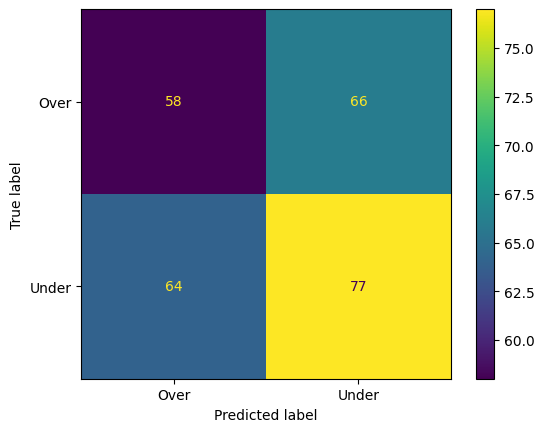


Results for 2022:
 Week  1: accuracy score=68.75%
 Week  2: accuracy score=31.25%
 Week  3: accuracy score=66.67%
 Week  4: accuracy score=50.00%
 Week  5: accuracy score=43.75%
 Week  6: accuracy score=64.29%
 Week  7: accuracy score=61.54%
 Week  8: accuracy score=50.00%
 Week  9: accuracy score=46.15%
 Week 10: accuracy score=42.86%
 Week 11: accuracy score=35.71%
 Week 12: accuracy score=56.25%
 Week 13: accuracy score=46.67%
 Week 14: accuracy score=61.54%
 Week 15: accuracy score=43.75%
 Week 16: accuracy score=42.86%
 Week 17: accuracy score=69.23%
 Week 18: accuracy score=43.75%
Season 2022: Total accuracy score=51.14%

Classification Report for 2022:
              precision    recall  f1-score   support

        Over       0.45      0.45      0.45       118
       Under       0.56      0.56      0.56       146

    accuracy                           0.51       264
   macro avg       0.51      0.51      0.51       264
weighted avg       0.51      0.51      0.51       264



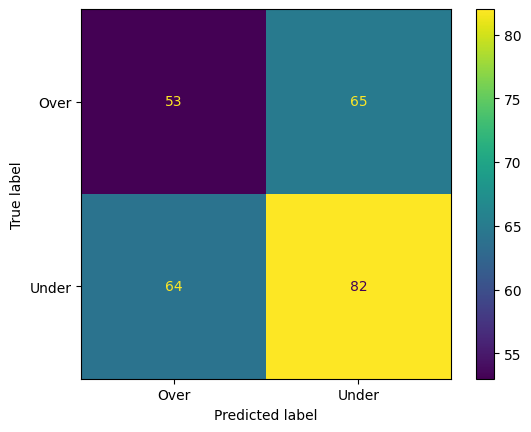


Results for 2023:
 Week  1: accuracy score=80.00%
 Week  2: accuracy score=68.75%
 Week  3: accuracy score=68.75%
 Week  4: accuracy score=75.00%
 Week  5: accuracy score=50.00%
 Week  6: accuracy score=50.00%
 Week  7: accuracy score=69.23%
 Week  8: accuracy score=53.33%
 Week  9: accuracy score=71.43%
 Week 10: accuracy score=35.71%
 Week 11: accuracy score=50.00%
 Week 12: accuracy score=75.00%
 Week 13: accuracy score=50.00%
 Week 14: accuracy score=41.67%
 Week 15: accuracy score=61.54%
 Week 16: accuracy score=42.86%
 Week 17: accuracy score=50.00%
 Week 18: accuracy score=64.29%
Season 2023: Total accuracy score=59.52%

Classification Report for 2023:
              precision    recall  f1-score   support

        Over       0.55      0.54      0.54       114
       Under       0.63      0.64      0.64       138

    accuracy                           0.60       252
   macro avg       0.59      0.59      0.59       252
weighted avg       0.59      0.60      0.59       252



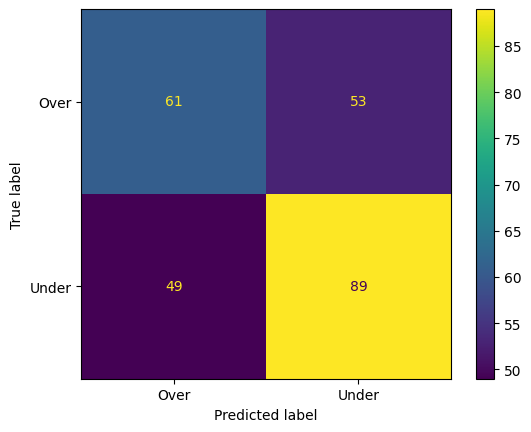

In [5]:
df = nfl_df.query('Home == 1').reset_index(drop=True)

features = ['Spread', 'Total']
target = 'Under'

for season in [2021, 2022, 2023]:
    print(f'\nResults for {season}:')

    y_preds = []
    y_trues = []

    for week in range(1, 19):

        print(f' Week {week:>2}:', end=' ')

        train_df = df.query('Season < @season or (Season == @season and Week < @week)')

        test_df = df.query('Season == @season and Week == @week and Actual_Total != Total')

        X_train = train_df[features]
        y_train = train_df[target]
        X_test = test_df[features]
        y_test = test_df[target]

        model = KNeighborsClassifier(n_neighbors=7)

        pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('model', KNeighborsClassifier(n_neighbors=7))
        ])

        clf = pipe.fit(X_train, y_train)

        pipe2 = Pipeline([
            ('scaler', StandardScaler()),
            ('lof', LocalOutlierFactor(novelty=True))
        ])
        pipe2.fit(X_train)
        y_test_novelty = pipe2.predict(X_test)

        mask = [y == 1 for y in y_test_novelty]
        X_test = X_test[mask]
        y_test = y_test[mask]
        
        y_pred = clf.predict(X_test)

        if week == 1:
            y_test = test_df[target]
            y_pred = [1] * len(y_test)
        y_true = y_test

        print(f'accuracy score={accuracy_score(y_true, y_pred):.2%}')

        y_preds += list(y_pred)
        y_trues += list(y_true)

    print(f'Season {season}: Total accuracy score={accuracy_score(y_trues, y_preds):.2%}')
    print(f'\nClassification Report for {season}:')
    print(classification_report(y_trues, y_preds, target_names=['Over', 'Under']))

    cm = confusion_matrix(y_trues, y_preds)
    display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Over', 'Under'])
    display.plot()
    plt.grid(False)
    plt.show()

In [8]:
df = nfl_df.query('Home == 1').reset_index(drop=True)

features = ['Spread', 'Total']
target = 'Under'

season = 2024
week = 11

train_df = df.query('Season < @season or (Season == @season and Week < @week)')

X_train = train_df[features]
y_train = train_df[target]

week1 = [
    ['Ravens @ Chiefs', -3.0, 46.5],
    ['Packers @ Eagles', -2.5, 49.0],
    ['Cardinals @ Bills', -5.5, 48.0],
    ['Panthers @ Saints', -4.0, 40.0],
    ['Texans @ Colts', +2.5, 49.0],
    ['Steelers @ Falcons', -3.0, 41.0],
    ['Titans @ Bears', -4.0, 44.5],
    ['Patriots @ Bengals', -9.0, 40.5],
    ['Cowboys @ Browns', -2.5, 43.0],
    ['Rams @ Lions', -3.5, 51.0],
    ['Jaguars @ Dolphins', -3.5, 49.0],
    ['Vikings @ Giants', +1.0, 41.0],
    ['Raiders @ Chargers', -3.5, 42.5],
    ['Broncos @ Seahawks', -5.0, 42.0],
    ['Commanders @ Buccaneers', -3.0, 42.5],
    ['Jets @ 49ers', -3.5, 44.0]
]

week2 = [
    ['Bills @ Dolphins', -2.5, 50.5],
    ['Chargers @ Panthers', +5.0, 42.5],
    ['Rams @ Cardinals', -1.0, 47.5],
    ['Saints @ Cowboys', -6.0, 44.5],
    ['Colts @ Packers', +2.5, 47.5],
    ['Steelers @ Broncos', +2.5, 41.0],
    ['Giants @ Commanders', -1.5, 43.0],
    ['Browns @ Jaguars', -3.0, 44.0],
    ['Bengals @ Chiefs', -6.0, 48.0],
    ['49ers @ Vikings', +5.0, 47.0],
    ['Seahawks @ Patriots', +3.5, 41.5],
    ['Jets @ Titans', +3.5, 44.5],
    ['Bucanners @ Lions', -7.5, 49.0],
    ['Raiders @ Ravens', -8.5, 44.0],
    ['Bears @ Texans', -6.5, 46.5],
    ['Falcons @ Eagles', -5.5, 47.5]
]

week3 = [
    ['Patriots @ Jets', -6.5, 42.0],
    ['Giants @ Browns', -6.5, 42.5],
    ['Bears @ Colts', -1.5, 46.5],
    ['Texans @ Vikings', +1.5, 46.5],
    ['Eagles @ Saints', -2.5, 45.0],
    ['Chargers @ Steelers', -2.5, 42.5],
    ['Broncos @ Buccaneers', -6.0, 42.5],
    ['Packers @ Titans', -3.0, 44.0],
    ['Panthers @ Raiders', -6.0, 42.0],
    ['Dolphins @ Seahawks', -4.5, 48.5],
    ['Lions @ Cardinals', +3.0, 50.0],
    ['Ravens @ Cowboys', +1.0, 48.0],
    ['49ers @ Rams', +6.5, 46.5],
    ['Chiefs @ Falcons', +3.0, 49.0],
    ['Jaguars @ Bills', -5.0, 48.5],
    ['Commanders @ Bengals', -7.5, 47.5]
]

week4 = [
    ['Cowboys @ Giants', +5.5, 44.5],
    ['Patriots @ 49ers', -10.5, 43.5],
    ['Bengals @ Panthers', +4.5, 45.5],
    ['Saints @ Falcons', -3.0, 44.5],
    ['Rams @ Bears', -3.0, 47.0],
    ['Vikings @ Packers', -3.0, 45.0],
    ['Eagles @ Buccaneers', +1.0, 47.0],
    ['Jaguars @ Texans', -5.5, 47.0],
    ['Steelers @ Colts', +2.0, 44.5],
    ['Broncos @ Jets', -8.0, 42.5],
    ['Commanders @ Cardinals', -3.5, 45.0],
    ['Browns @ Raiders', +2.5, 43.5],
    ['Chiefs @ Chargers', +7.5, 46.0],
    ['Bills @ Ravens', -2.5, 46.5],
    ['Titans @ Dolphins', -2.5, 46.0],
    ['Seahawks @ Lions', -3.5, 49.0]
]

week5 = [
    ['Buccaneers @ Falcons', -2.5, 44.5],
    ['Jets @ Vikings', -2.5, 42.5],
    ['Ravens @ Bengals', +2.5, 46.5],
    ['Dolphins @ Patriots', +1.0, 45],
    ['Panthers @ Bears', -4.0, 42.0],
    ['Bills @ Texans', -1.0, 47.5],
    ['Colts @ Jaguars', -3.0, 47.0],
    ['Browns @ Commanders', -3.5, 43.5],
    ['Raiders @ Broncos', -3.0, 41.0],
    ['Cardinals @ Niners', -7.0, 47.0],
    ['Packers @ Rams', +3.0, 48.0],
    ['Giants @ Seahawks', -7.0, 43.0],
    ['Cowboys @ Steelers', -2.5, 43.0],
    ['Saints @ Cheifs', -5.5, 43.5],
]

week6 = [
    ['Niners @ Seahawks', +3.5, 46.5],
    ['Jaguars @ Bears', -1.5, 44.5],
    ['Cardinals @ Packers', -5.0, 47.0],
    ['Texans @ Patriots', +7.0, 38.0],
    ['Commanders @ Ravens', -6.5, 51.5],
    ['Buccaneers @ Saints', +3.5, 41.5],
    ['Browns @ Eagles', -9.5, 42.5],
    ['Colts @ Titans', -2.5, 43.0],
    ['Chargers @ Broncos', +3.0, 36.0],
    ['Steelers @ Raiders', +3.0, 36.5],
    ['Falcons @ Panthers', +6.0, 47.0],
    ['Lions @ Cowboys', +3.0, 52.0],
    ['Bengals @ Giants', +3.5, 47.5],
    ['Bills @ Jets', +2.5, 41.0],
]

week7 = [
    ['Broncos @ Saints', +3.0, 41.5],  
    ['Patriots @ Jaguars', -6.0, 40.5], 
    ['Seahawks @ Falcons', -3.0, 47.0],
    ['Titans @ Bills', -9.5, 46.5],
    ['Bengals @ Browns', +5.5, 46.0],
    ['Texans @ Packers', -3.0, 48.5],
    ['Dolphins @ Colts', -3.0, 49.0],
    ['Lions @ Vikings', -1.5, 48.0],
    ['Eagles @ Giants', +3.5, 44.0],
    ['Raiders @ Rams', -7.0, 45.5],
    ['Panthers @ Commanders', -9.5, 41.0],
    ['Chiefs @ 49ers', -1.5, 47.5],
    ['Jets @ Steelers', +1.5, 43.0], 
    ['Ravens @ Buccaneers', +3.5, 44.5],
    ['Chargers @ Cardinals', +1.5, 47.0]  
]

week8 = [
    ['Vikings @ Rams', +2.5, 45.5],
    ['Ravens @ Browns', +8.5, 45.0],
    ['Colts @ Texans', -5.0, 47.5],
    ['Packers @ Jaguars', +3.5, 45.0],
    ['Cardinals @ Dolphins', -4.0, 48.5],
    ['Jets @ Patriots', +7.0, 40.5],
    ['Falcons @ Buccaneers', +2.5, 42.5],
    ['Eagles @ Bengals', -2.5, 47.5],
    ['Saints @ Chargers', -7.0, 42.5],
    ['Bills @ Seahawks', +3.0, 46.5],
    ['Panthers @ Broncos', -11.0, 40.5],
    ['Chiefs @ Raiders', +8.5, 46.0],
    ['Cowboys @ 49ers', -5.5, 46.5],
    ['Bears @ Commanders', -1.0, 44.5],  
    ['Titans @ Lions', -11.5, 47.5],     
    ['Giants @ Steelers', -6.0, 41.5]    
]

week9 = [
    ['Texans @ Jets', -2.5, 45.0],
    ['Cowboys @ Falcons', -3.0, 46.0],
    ['Dolphins @ Bills', -6.0, 47.5],
    ['Raiders @ Bengals', -7.0, 44.0],
    ['Chargers @ Browns', +1.5, 43.5],
    ['Patriots @ Titans', -3.5, 45.0],
    ['Commanders @ Giants', +4.0, 42.0],
    ['Saints @ Panthers', +7.0, 43.0],
    ['Broncos @ Ravens', -8.0, 41.0],
    ['Jaguars @ Eagles', -7.5, 47.0],
    ['Bears @ Cardinals', -1.5, 42.5],
    ['Lions @ Packers', +2.5, 44.5],
    ['Rams @ Seahawks', +1.5, 46.0],
    ['Colts @ Vikings', -5.5, 45.0],
    ['Buccaneers @ Chiefs', -8.5, 49.0]
]

week10 = [
    ['Bengals @ Ravens', -6.0, 46.0],
    ['Giants @ Panthers', +6.5, 40.5],
    ['Patriots @ Bears', -6.0, 42.0],
    ['Bills @ Colts', +4.0, 46.5],
    ['Broncos @ Chiefs', -7.5, 44.5],
    ['Falcons @ Saints', +3.5, 44.5],
    ['49ers @ Buccaneers', +6.5, 46.5],
    ['Steelers @ Commanders', -3.0, 43.5],
    ['Vikings @ Jaguars', +7.0, 44.5],
    ['Titans @ Chargers', -7.5, 42.5],
    ['Eagles @ Cowboys', +7.5, 48.0],
    ['Jets @ Cardinals', +1.5, 45.5],
    ['Lions @ Texans', +3.5, 50.0],
    ['Dolphins @ Rams', -1.5, 46.0]
]

week11 = [
    ['Washington @ Philadelphia', -4.0, 45.5],
    ['Green Bay @ Chicago', +5.5, 40.0],
    ['Jacksonville @ Detroit', -14.0, 46.5],
    ['Minnesota @ Tennessee', +6.0, 39.5],
    ['Las Vegas @ Miami', -7.5, 44.0],
    ['LA Rams @ New England', +4.5, 43.5],
    ['Cleveland @ New Orleans', -0.5, 44.5],
    ['Baltimore @ Pittsburgh', +3.0, 48.0],
    ['Indianapolis @ NY Jets', -4.0, 44.0],
    ['Atlanta @ Denver', -2.5, 44.0],
    ['Seattle @ San Francisco', -6.5, 48.0],
    ['Kansas City @ Buffalo', -2.5, 46.0],
    ['Cincinnati @ LA Chargers', -1.5, 47.5],
    ['Houston @ Dallas', +7.5, 42.0]
]


X_new = pd.DataFrame(week11, columns=['Game', 'Spread', 'Total'])

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KNeighborsClassifier(n_neighbors=7))
])

clf = pipe.fit(X_train, y_train)

lof = LocalOutlierFactor(novelty=True)
pipe2 = Pipeline([
    ('scaler', StandardScaler()),
    ('lof', LocalOutlierFactor(novelty=True))
])
pipe2.fit(X_train)
y_test_novelty = pipe2.predict(X_new[features])

mask = [y == 1 for y in y_test_novelty]
X_new = X_new[mask]
        
y_pred = clf.predict(X_new[features])

if week == 1:
     y_pred = [1] * len(X_new)


X_new['KNC(7)'] = y_pred
X_new['KNC(7)'] = X_new['KNC(7)'].apply(lambda x: 'Under' if x == 1 else 'Over')

print(f'MODEL PREDICTIONS FOR WEEK {week} OF THE {season} NFL SEASON\n')
print(X_new[['Game','Spread','Total','KNC(7)']]) 

MODEL PREDICTIONS FOR WEEK 11 OF THE 2024 NFL SEASON

                         Game  Spread  Total KNC(7)
0   Washington @ Philadelphia    -4.0   45.5   Over
1         Green Bay @ Chicago     5.5   40.0   Over
2      Jacksonville @ Detroit   -14.0   46.5  Under
3       Minnesota @ Tennessee     6.0   39.5   Over
4           Las Vegas @ Miami    -7.5   44.0   Over
5       LA Rams @ New England     4.5   43.5  Under
6     Cleveland @ New Orleans    -0.5   44.5   Over
7      Baltimore @ Pittsburgh     3.0   48.0   Over
8      Indianapolis @ NY Jets    -4.0   44.0   Over
9            Atlanta @ Denver    -2.5   44.0   Over
10    Seattle @ San Francisco    -6.5   48.0  Under
11      Kansas City @ Buffalo    -2.5   46.0   Over
12   Cincinnati @ LA Chargers    -1.5   47.5  Under
13           Houston @ Dallas     7.5   42.0   Over


In [7]:
import pickle

# Save the model to a file
with open('model.pkl', 'wb') as file:
    pickle.dump(clf, file)